In [1]:
import astropy
from astropy.table import Table, vstack, Column
from astropy.io import fits
#import dace
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(13)

In [2]:
from utils import *

#### stellar sample

These stars are all HARPS GTO targets (as uniformly characterized by Sousa et al. 2008) with measured vsini (as non-uniformly measured and compiled in Glebocki et al. 2006).

In [3]:
t = Table.read('gto-with-precision.csv', format='csv')

<ipython-input-4-1c6ac5748b57>:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(t['Teff'], t['logg'], c=np.log(t['vsini']))


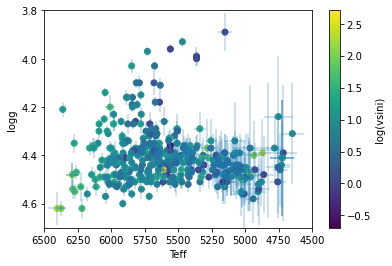

In [4]:
plt.errorbar(t['Teff'], t['logg'], xerr=t['e_Teff'], yerr=t['e_logg'], fmt='none',  alpha=0.3)
plt.scatter(t['Teff'], t['logg'], c=np.log(t['vsini']))
plt.ylim([4.7,3.8])
plt.xlim([6500,4500])
plt.colorbar(label='log(vsini)')
plt.xlabel('Teff')
plt.ylabel('logg');

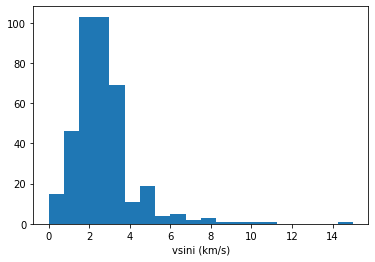

In [5]:
plt.hist(t['vsini'], bins=20)
plt.xlabel('vsini (km/s)');

In [6]:
t.columns

<TableColumns names=('d_arcsec','_RAJ2000','_DEJ2000','Star','Teff','e_Teff','logg','e_logg','__Fe_H_','e__Fe_H_','Mass','logL','e_logL','VMAG','Pl_','SimbadName','_RA','_DE','_RAJ2000_2','_DEJ2000_2','recno','catID','vsini','w_vsini','o_vsini','n_vsini','Simbad','_RA_2','_DE_2','starname','err_rv_scaled')>

In [7]:
mask = t['vsini'] <= 12.

teffs = t['Teff'][mask]
logg = t['logg'][mask]
err_rvs = t['err_rv_scaled'][mask]
vsinis = t['vsini'][mask]

In [8]:
np.sum(mask)

384

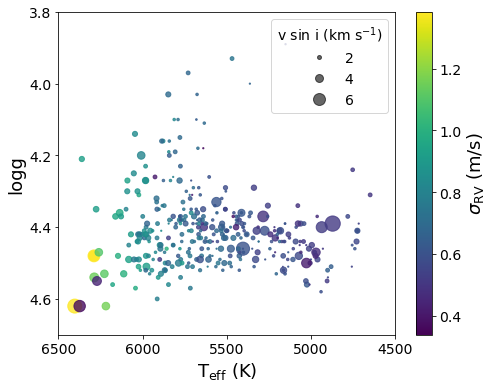

In [30]:
def size_func(s):
    # take a scatter point size, return vsini value
    return np.sqrt(s)/2.

fig, ax = plt.subplots(1, 1, figsize=(7,5.5))
scatter = plt.scatter(teffs, logg, c=err_rvs, 
                      alpha=0.8, s=2*vsinis**2)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, func=size_func, num=5)
legend = plt.legend(handles, labels, loc="upper right", title=r"v sin i (km s$^{-1}$)", 
                    fontsize=14, title_fontsize=14, ncol=1)
#plt.legend(*scatter.legend_elements(prop="sizes", num=5, func=size_func),
#          title=r'v sin i (km s$^{-1}$)')
ax.set_xlabel(r'T$_{\mathrm{eff}}$ (K)', fontsize=18)
ax.set_ylabel('logg', fontsize=18)
ax.set_xlim([6500,4500])
ax.set_ylim([4.7,3.8])
ax.set_xticks(np.arange(6500,4400,-500))
ax.tick_params(axis='both', which='major', labelsize=14)
cbar = plt.colorbar(label=r'$\sigma_{\mathrm{RV}}$ (m/s)')
cbar.set_label(label=r'$\sigma_{\mathrm{RV}}$ (m/s)', size=18)
cbar.ax.tick_params(labelsize=14)
cbar.solids.set_edgecolor("face")
fig.tight_layout()
plt.savefig('rv-info-content.png');

#### HERMES spectrum